# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import scipy.stats as st
import scipy
from scipy.stats import norm
from matplotlib.mlab import normpdf



In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

populationMu=98.6 # Population Mean
populationSigma = 'N/A' #Population Standard Deviation
populationProportion = 'N/A'

sampleStats = df.temperature.describe()
#Point Estimate
sampleN = sampleStats[0]

print("Population mean:", populationMu)
print("Population standard deviation:", populationSigma)
print("Sample size: ", sampleN)

Population mean: 98.6
Population standard deviation: N/A
Sample size:  130.0


#### CLT & Calculations:
According to the Central Limit Theorem, if the population distribution is normal,the sampling distribution will also be nearly normal,regardless of the sample size.We illustrated this earlier when we working with the outlet where we looked at a sample size of 45 as well as a sample size of 500, and in both instances the sampling distribution was nearly normal.However, if the population distribution is not normal,the more skewed the population distribution,the larger sample size we need for the central limit theorem to apply.
 
The standard error is equal to sigma over square root of n, but understanding the inverse relationship between them is very important. As the sample size increases, we would expect samples to yield more consistent sample means, hence the variability among the sample means would be lower, which results in a lower standard error.
 
 
According to central Limit Theorem (CLT), the distribution of sample statistics is nearly normal centered t the population mean, and with a standard deviation equal to the population deviation divided by square root of the sample size.
Shape of distribution : Sample Mean is nearly normal 
Sample Mean determines the center of the distribution
Spread of the distribution = standard error

1. Population is the temperature values of entire humans in the world.
2. What we have is "a" sample of size 130 from that population.
3. The population parameter we are trying to analyze is mean.
4. Here on, when we say "the sample" it refers to the given sample values.

# Is the distribution of body temperatures normal?

Plot the temperature data both in a histrogram with an associated kernel density estimate of the pdf

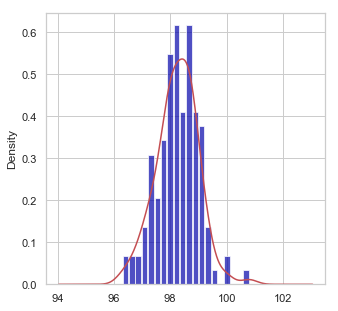

In [3]:
fig = plt.figure(figsize=(5,5))
df['temperature'].plot(kind="hist",x='temperature',bins=20,color='#0504aa',
                            alpha=0.7, rwidth=0.85,normed=True)
df['temperature'].plot.kde(x='temperature',c='r')

plt.show()

Note that distribution of sampled body temperatures is bell-shaped and fairly symmetric.
Here there are 130 total observations.

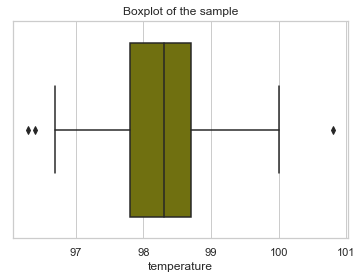

In [4]:
sns.boxplot(df['temperature'],color='olive')
plt.title('Boxplot of the sample')
plt.show()

In [5]:
#Remove Outliers above or below 3 standard deviations
df = pd.read_csv('data/human_body_temperature.csv')

from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .003
    high = .997
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df['temperature']):
            df = df[(df['temperature'] > quant_df.loc[low, 'temperature']) & (df['temperature'] < quant_df.loc[high, 'temperature'])]
    return df

df = remove_outlier(df)
print("Total number of outliers above 3 standard deviation: %d" %(sampleN - len(df.temperature)))

Total number of outliers above 3 standard deviation: 2


The box plot shows that the data is moderately left skewed.For moderately skewed distributions, n greater than 30 is a widely used rule of thumb 


Standardized (mean centered and standard deviation scaled) temperature data in a quantile-quantile plot:

In [6]:

sampleStats = df.temperature.describe()
#Point Estimate
sampleN = sampleStats[0]
sampleMean = sampleStats[1] # Sample Mean xbar
sampleSigma = sampleStats[2] # Sample Standard Deviation
sqRootN = np.sqrt(sampleN)
#If population variance is available, use population standard deviation to calculate standard error, 
#else use sample standard deviation 

sampleDegOfFreedom = sampleN - 1

alpha = 0.05

if populationSigma != 'N/A':
    stdError  = populationSigma /sqRootN
else:
    stdError  = sampleSigma /sqRootN
    
sampleProportion = 'N/A'
    
print("Population mean:", populationMu)
print("Population standard deviation:", populationSigma)
print("Sample size: ", sampleN)
print("Sample mean:", sampleMean)
print("Sample standard deviation:", sampleSigma)
print("Standard Error:", stdError)   
print("Sample Degrees of Freedom:", sampleDegOfFreedom)   
print("Significance Value:", alpha)   





Population mean: 98.6
Population standard deviation: N/A
Sample size:  128.0
Sample mean: 98.24453125
Sample standard deviation: 0.681800371844
Standard Error: 0.0602632082933
Sample Degrees of Freedom: 127.0
Significance Value: 0.05


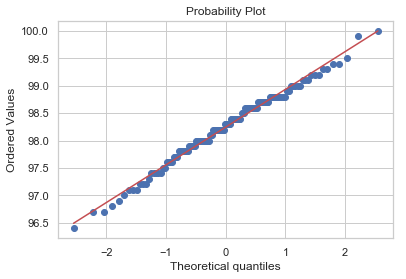

In [7]:
#standard_temp = (df.temperature - df.temperature.mean())/(df.temperature.std())
#temp_qq = st.probplot(standard_temp, dist="norm", plot=plt)
# using stats' probability plot (very similar to a Q-Q plot, 
# (a probability plot compares a sample vs a theoretical distribution. A qq plot compares two samples.)
from scipy import stats
d = df.temperature
fig, ax = plt.subplots()
res = stats.probplot(d, plot=ax)
plt.show()


The histrogram appears approximately normal, and the Q-Q plot shows that the quantiles of the data match the theoretical quantiles fairly well.

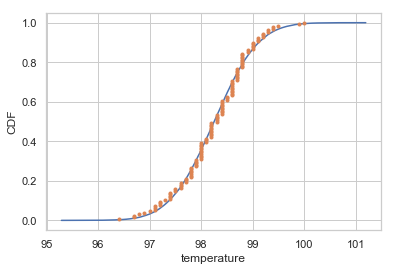

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

temp = df.temperature
x,y = ecdf(temp)
mu, std = np.mean(temp), np.std(temp)
samples = np.random.normal(mu, std, size=100000)
x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

The CDF chart shows  a segment going from one corner to the other one, on a wide range of values: the values are uniformally distributed. The empirical and theoretical values overlap.The sample CDF seems to follow its expected CDF relatively closely. 

#### Plotting a Kernel Density Estimate (KDE)

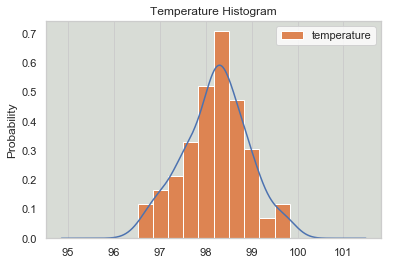

In [9]:
# Sample from two different normal distributions
dist = pd.DataFrame(np.random.normal(loc=sampleMean, scale=sampleSigma, size=len(df.temperature)),columns=['temperature'])
dist.agg(['min', 'max', 'mean', 'std','count']).round(decimals=2)
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Temperature Histogram')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

This visual inspection combined with the normality test means it is definitely safe to say that the body temperature is normally distributed.

#### Normality Test using Shapiro, Anderson methods

In [10]:
from scipy.stats import shapiro
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import anderson

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(df['temperature'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Shapiro-Wilk Test: Sample looks Gaussian (fail to reject H0)')
else:
	print('Shapiro-Wilk Test: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(df['temperature'])
# interpret
alpha = 0.05
if p > alpha:
	print('D’Agostino’s K^2 Test: Sample looks Gaussian (fail to reject H0)')
else:
	print('D’Agostino’s K^2 Test : Sample does not look Gaussian (reject H0)')


##Anderson-Darling Test
result = anderson(df['temperature'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, Anderson-Darling Test : data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, Anderson-Darling Test: data does not look normal (reject H0)' % (sl, cv))

Statistics=0.991, p=0.544
Shapiro-Wilk Test: Sample looks Gaussian (fail to reject H0)
D’Agostino’s K^2 Test: Sample looks Gaussian (fail to reject H0)
Statistic: 0.465
15.000: 0.559, Anderson-Darling Test : data looks normal (fail to reject H0)
10.000: 0.637, Anderson-Darling Test : data looks normal (fail to reject H0)
5.000: 0.764, Anderson-Darling Test : data looks normal (fail to reject H0)
2.500: 0.892, Anderson-Darling Test : data looks normal (fail to reject H0)
1.000: 1.060, Anderson-Darling Test : data looks normal (fail to reject H0)


The temperature data is approximately normal in distribution. You can see this with a histogram plot with 20 bins and 15 bins. The probability plot shows the temperature data transformed and plotted against the fitted normal line - it shows a good match. The normal test uses the D'Agostino's K^2 Test and is returning a p-value of 0.2587 so there is a 26% chance that we would get a chi-squared statistic that large (or larger) if our data were taken from a perfectly normal distribution. We can be confident with a statistical significance of 95% that the temperature data is from a normal distribution.


In [11]:
### Display percentiles on the chart

2.5th percentile: 96.817
97.5th percentile: 99.400 
median: 98.300 
mean: 98.245


Text(99.4,0.139181,'97.5th percentile')

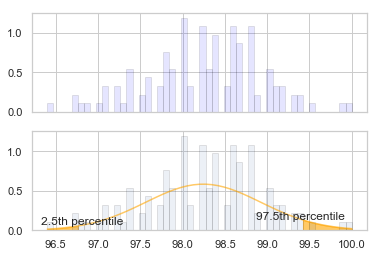

In [12]:
#Source : stack overflow
# dummy data
mu = sampleMean
sigma = sampleSigma
n_bins = 50
s=df.temperature
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
n, bins, patches = axes[0].hist(s, n_bins, normed=True, alpha=.1, edgecolor='black', color='blue' )

#histogram
n, bins, patches = axes[1].hist(s, n_bins, normed=True, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

median, q1, q3 = np.percentile(s, 50), np.percentile(s, 2.5), np.percentile(s, 97.5)
print("2.5th percentile: {:.3f}\n97.5th percentile: {:.3f} \nmedian: {:.3f} \nmean: {:.3f}".format(q1,q3,median,mu))

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#to ensure pdf and bins line up to use fill_between.
bins_1 = bins[(bins >= q1-1.5*(q3-q1)) & (bins <= q1)] # to ensure fill starts from Q1-1.5*IQR
bins_2 = bins[(bins <= q3+1.5*(q3-q1)) & (bins >= q3)]
pdf_1 = pdf[:int(len(pdf)/2)]
pdf_2 = pdf[int(len(pdf)/2):]
pdf_1 = pdf_1[(pdf_1 >= norm(mu,sigma).pdf(q1-1.5*(q3-q1))) & (pdf_1 <= norm(mu,sigma).pdf(q1))]
pdf_2 = pdf_2[(pdf_2 >= norm(mu,sigma).pdf(q3+1.5*(q3-q1))) & (pdf_2 <= norm(mu,sigma).pdf(q3))]

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
axes[1].fill_between(bins_1, pdf_1, 0, alpha=.6, color='orange')
axes[1].fill_between(bins_2, pdf_2, 0, alpha=.6, color='orange')

#add text to bottom graph.
#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
#axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)-norm(mu, sigma).cdf(q1))), xy=(median, 0), ha='center')
#axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+1.5*(q3-q1)-q3)-norm(mu, sigma).cdf(q3))), xy=((q3+1.5*(q3-q1)+q3)/2, 0), ha='center')
axes[1].annotate('2.5th percentile', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
axes[1].annotate('97.5th percentile', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')


Depending on the shape of the distribution we can pick the confidence to calculate the marigin of error and confidence interval.

With 95% in the center, the lower tail area is 2.5%.
 

# Is the sample size large? Are the observations independent?

    Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 



Given a target margin of error, confidence level,
 and information on the variability of the sample or the population, we
 can determine the required sample size to achieve the desired margin of error.
 We do this by plugging known values into the equation of the margin of
 error and then rearranging things to solve for the unknown and the sample size.
 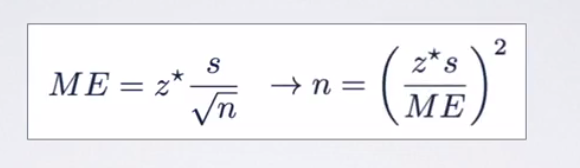

In [13]:
z_critical = st.norm.ppf(q = 0.975)
print("z-critical value:",z_critical)# Check the z-critical value

margin_of_error = z_critical * stdError
print("margin_of_error :",margin_of_error)


n = ((z_critical*sampleSigma)/margin_of_error)**2
print("Minimum sample size for 99% confidence interval", round(n))

z-critical value: 1.95996398454
margin_of_error : 0.118113717848
Minimum sample size for 99% confidence interval 128.0


In [14]:
t_critical = st.t.ppf(q = 0.975, df=sampleDegOfFreedom)  
print("Confidence:",'95%')

print("t-critical value:",t_critical)# Check the z-critical value

margin_of_error = t_critical * stdError


n = ((t_critical*sampleSigma)/margin_of_error)**2
print("Minimum sample size for 95% confidence interval", round(n))

Confidence: 95%
t-critical value: 1.97881953468
Minimum sample size for 95% confidence interval 128.0


With no apparent strong skew or strong non-normality, 130 observations should be sufficient for standard t statistics to have approximately the appropriate sampling distrubtion. There is no way to check that the observations are independent, but if each observation of temperature is taken from a differnt person and these people generally don't interact with each other, it is reasonable to think that the observations will be approximately independent.

This distribution of the population is also something very difficult to verify because we often do not know what the population looks like.
That's why we're doing this investigation in the first place, but we can check it using the sample data.And assume that the sample mirrors the population so if you make a plot of your sample distribution and it looks nearly normal then you might be fairly certain that the parent population distribution is coming from is nearly normal as well. 

And a good rule of thumb usually, if we're sampling without replacement is going to be that we don't grab more than 10% of the population to be in our sample.

# Is the true population mean really 98.6 degrees F?

    First, try a bootstrap hypothesis test.
    Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why? 

## Setting and conducting Hypothesis test

Five step process for hypothesis testing
1. State Null and Alternate Hypothesis
2. Select a level of significance
3. Identify the test statistic
4. Formulate a decision rule
5. Take a sample, arrive at a decision
6. Do not reject H0 OR Reject H0

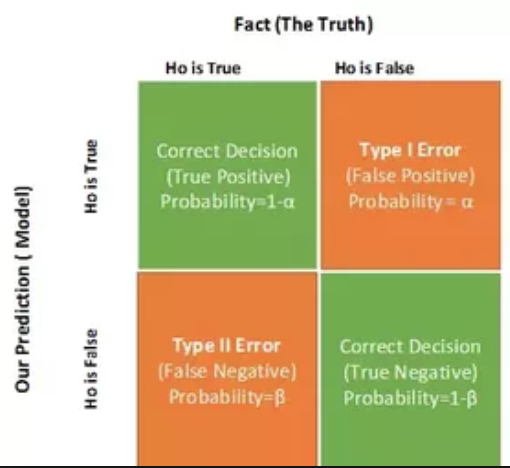


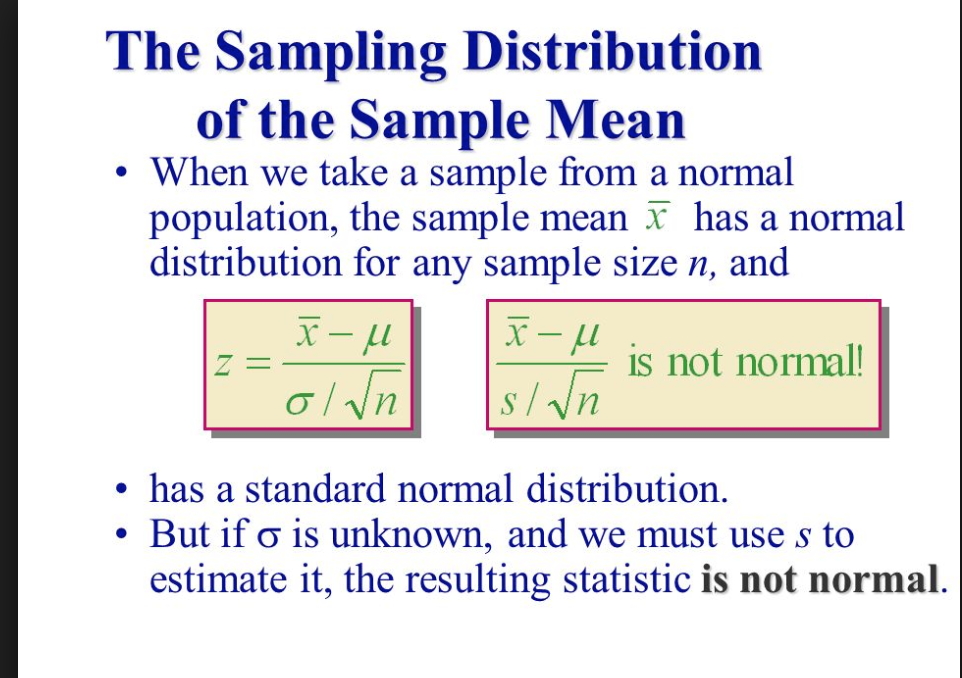

H0: Mean body temperature, mu = 98.6 deg

HA: Mean body temperature mu != 98.6 deg

Significance level alpha = 0.05, corresponding to 99% confidence level (as this is two sided test, from the question). Traditionally, 0.05 level is selected for consumer research, 0.01 for quality assurance, .10 for political polling

Type of test : one sample test test whether a group of observations has a certain mean

One-Tailed or Two-Tailed Tests of significance :
Test is one-tailed if HA (Alternate Hypothesis) states a direction, if H1 < population mean or H1 > population mean
Test is two-tailed if HA (Alternate Hypothesis) does not state a direction

In the body temperature example, he test is two-tailed.

t-statistic or z-statistic : Since the population variance is unknown, a t-test is appropriate. 

We divide by the standard error, and not the sigma of the standard deviation of the population.Because the observation of interest, the 98.6, is a sample mean and not an individual temperature. We measure the variability of individual observations with standard deviations.We measure the variability of sample means with standard errors.So whatever the observation is that you plug in in the numerator in your Z-score, its variability belongs in the denominator.In other words, our observation is an X bar, and not an X.This is where we can see the notation from earlier come in handy.



In the next section let's use the t-statistic since population variance is not available to calculate the z score and p-value to verify if the values fit the confidence interval and prove the Null hypothesis


### Frequentist Statitical Test


Would you use a one-sample or two-sample test? As we have one sample of data I'll be running a one sample test, however I have defined Ha as the true mean temperature could be higher or lower than 98.6' so it will be a two tail test.

In this situation, is it appropriate to use the t or z statistic? As I am measuring means on a population a t statistic is appropriate. A z test should also be valid as the sample size is much larger than 30.

#### t Test Statistic

The t statistic calculated by the test can be interpreted by comparing it to critical values from the t-distribution. The critical value can be calculated using the degrees of freedom and a significance level with the percent point function (PPF).

We can interpret the statistic value in a two-tailed test, meaning that if we reject the null hypothesis, it could be because the first mean is smaller or greater than the second mean. To do this, we can calculate the absolute value of the test statistic and compare it to the positive (right tailed) critical value, as follows:

If abs(t-statistic) = critical value: Accept null hypothesis that the means are equal.

If abs(t-statistic) != critical value: Reject the null hypothesis that the means are equal.

We can also retrieve the cumulative probability of observing the absolute value of the t-statistic using the cumulative distribution function (CDF) of the t-distribution in order to calculate a p-value. The p-value can then be compared to a chosen significance level (alpha) such as 0.05 to determine if the null hypothesis can be rejected:

If p > alpha: Accept null hypothesis that the means are equal.
If p <= alpha: Reject null hypothesis that the means are equal.

Also, suppose we set our significance level α at 0.05, so that we have only a 5% chance of making a Type I error.

A two-tailed Z-test are significant if the absolute value of the test statistic is equal to or greater than 1.96, the critical value in this case

In [15]:
#Method 1
# Get the t-critical value
t_critical = st.t.ppf(q = 0.975, df=sampleDegOfFreedom)  
print("Confidence:",'95%')
print("t-critical value:",t_critical)

alpha = 0.05
# calculate the critical value
t_critical_2 = st.t.ppf(1.0 - (alpha/2), sampleDegOfFreedom)
print("t-critical value using significance value:",t_critical_2)

margin_of_error = t_critical * stdError

confidence_interval = (sampleMean - margin_of_error,
                       sampleMean + margin_of_error)

pi_width = t_critical * sampleSigma * np.sqrt((1 + 1/sampleN))


#pi_width = t_critical * margin_of_error * np.sqrt((1 + 1/sampleN))

prediction_interval = (sampleMean - pi_width,
                       sampleMean + pi_width)  

print("Confidence interval:",confidence_interval)
print("Prediction interval:",prediction_interval)

#The spread of the sampling distribution, which we measure using the standard error.If sigma is unknown which is often the case,
#where sigma is the population standard deviation and oftentimes,we don't have access to the entire population to calculate this number,
#we use S, the standard sample deviation to estimate the standard error.

# Here standard sample deviation is used instead of population std
#Degrees of freedom = n-1
pvalues = st.t.cdf(x= t_critical,      # T-test statistic
               df= 129) * 2   # Mupltiply by two for two tailed test*
print(("The probability of the t_critical <= {:.3} : {:}").format(t_critical,pvalues))

significanceValue =  2*(1 - st.norm.cdf(abs(t_critical)))
print(("The Significance value of t_critical <= {:.3} : {:.3}").format(t_critical,significanceValue))


tscore = (sampleMean-populationMu) / stdError
print(("The  t-score <= {:.3}").format(tscore))

pvalues = st.t.cdf(x= tscore,      # T-test statistic
               df= 129) * 2
print(("The probability of the t-score {:.3} : {:.3}").format(tscore,pvalues))

if pvalues > alpha/2:
    print("Sample indicates that the true population's mean could be 98.6 (fail to reject H0)")
else:
    print("Sample does not indicate that the true population's mean could be 98.6 (reject H0)")

print(("We are 95% confident that the population mean is between {:.3f} - {:.3f}").format(confidence_interval[0],confidence_interval[1]))

Confidence: 95%
t-critical value: 1.97881953468
t-critical value using significance value: 1.97881953468
Confidence interval: (98.125281236206632, 98.363781263793413)
Prediction interval: (96.890111452863934, 99.598951047136111)
The probability of the t_critical <= 1.98 : 1.9500336492297392
The Significance value of t_critical <= 1.98 : 0.0478
The  t-score <= -5.9
The probability of the t-score -5.9 : 3.03e-08
Sample does not indicate that the true population's mean could be 98.6 (reject H0)
We are 95% confident that the population mean is between 98.125 - 98.364


In [16]:
#Method 2
st.ttest_1samp(df.temperature, 98.6)


Ttest_1sampResult(statistic=-5.8986031455494112, pvalue=3.1180809608512475e-08)

This indicates that the mean temperature of this data is statistically significantly differnt from 98.6. 

Using the critical value approach, if the test statistic is more  extreme as the critical value, then the null hypothesis is rejected. In this case the p-value is more extreme than the critical value, which means null hypothesis is rejected.That is, we  reject the null hypothesis H0 : μ = 98.6 in favor of the alternative hypothesis HA : μ != 98.6 since the test statistic t* is less than 1.979


According to the empirical rule, 95% of the probability is within 3 standard deviations.That means that P(Z > 5.45) is even smaller than P(Z > 2.0), where Z is a standard normal variable. Since P(Z > 3.0) is already very small, the actual p-value=5.9 will be even closer to zero. The probability of getting a result more extreme than this result, we're thinking about the area under the bell curve, both in the negative direction or in the positive direction. 

Don't view a confidence interval and misinterpret it as the range that contains 95% of the values.It is correct to say that there is a 95% chance that the confidence interval you calculated contains the true population mean . It is not quite correct to say that there is a 95% chance that the population mean lies within the interval.Confidence intervals don't show the distribution of sample data; they do give us plausible estimates for population parameters.98.6 population mean is not in the range of population parameters described by the confidence interval. 

Both ends of the tail combined is nearing 0% stating that the probabilty of getting a sample this extreme is or more extreme than this is 0% which favors alternate hypothesis. Here we reject null hypothesis that mu=98.6 deg F, in favor of alternate hypothesis that mu != 98.6 deg F. 

For comparison lets do the p-value of a z-test 

### z Test Statistic

In [17]:


print("Population mean:", 98.6)
print("Sample size: ", len(df['temperature']))
print("Sample mean:", np.mean(df['temperature']))
print("Sample SD:", np.std(df['temperature']))    

#The spread of the sampling distribution, which we measure using the standard error.If sigma is unknown which is often the case,
#where sigma is the population standard deviation and oftentimes,we don't have access to the entire population to calculate this number,
#we use S, the standard sample deviation to estimate the standard error.

# Here standard sample deviation is used instead of population std
standardError = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print("Standard Error:", standardError)

zscore = (np.mean(df['temperature'])-98.6) / standardError
print(("The Z-score is {:.3} ").format(zscore))

#Multiply by 2 for a two-tailed test
pvalues =  2*(1 - st.norm.cdf(abs(zscore)))
print(("The probability of the Z-score <= {:.3} : {:.3}").format(zscore,pvalues))
print("Confidence Level corresponding to this p-value is {:.3%}".format((1-pvalues)))

if p > alpha:
    print("Sample indicates that the true population's mean could be 98.6 (fail to reject H0)")
else:
    print("Sample does not indicate that the true population's mean could be 98.6 (reject H0)")

Population mean: 98.6
Sample size:  128
Sample mean: 98.24453125000002
Sample SD: 0.6791318669989184
Standard Error: 0.0600273435594
The Z-score is -5.92 
The probability of the Z-score <= -5.92 : 3.18e-09
Confidence Level corresponding to this p-value is 100.000%
Sample does not indicate that the true population's mean could be 98.6 (reject H0)


### Interpretation

The p-value for the z-test is lower than the t-test, which is expected because the t distribution has heavier tails than the normal which are used to account for the additional variance in the test statistic that results from not knowing the population variance. In this case, the qualitative conclusions of the two tests are similar.




## Bootstrap hypothesis test


In [18]:
# We will test if H0 should be rejected in favor or HA using bootstrap method:
# First step, write a function for bootstrap replicates
import numpy as np
def draw_bs_reps(data, func, size=1,len_d=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates by resampling with replacement
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,len_d))
    return bs_replicates
 
def diff_from_popmean(data,valmean=98.6):
    return np.mean(data) - valmean

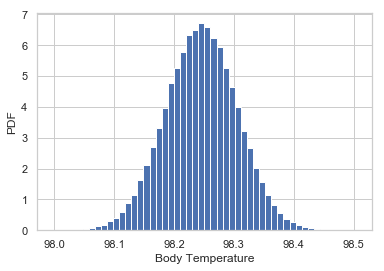

In [19]:
bs_replicates = draw_bs_reps(df.temperature,np.mean,100000,len_d = len(df.temperature))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Pvalue computed using Bootstrap replicates: 0.0


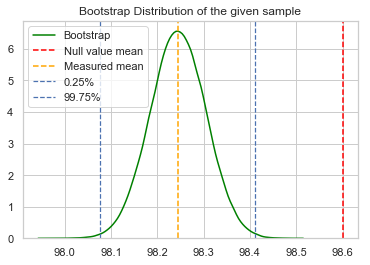

In [20]:
# Draw bootstrap replicates
emp_mean = df.temperature.mean()
mu = 98.6
bs_reps = draw_bs_reps(df.temperature,np.mean,100000,len_d = len(df.temperature))
me = abs(mu-emp_mean)
left_limit = emp_mean - (me)
right_limit = emp_mean + me
# Plot the bs_reps
sns.distplot(bs_reps, hist=False,color='green',label='Bootstrap')
plt.title("Bootstrap Distribution of the given sample")
plt.axvline(mu,color='red',linestyle='--',linewidth=1.5,label='Null value mean')
plt.axvline(np.mean(bs_reps),color='orange',linestyle='--',linewidth=1.5,label='Measured mean')
plt.axvline(np.percentile(bs_reps, .25), linestyle='--',linewidth=1.25,label='0.25%')
plt.axvline(np.percentile(bs_reps, 99.75), linestyle='--',linewidth=1.25,label='99.75%')
plt.legend(loc = 'upper left')
pval_bs = (np.sum(bs_reps <= left_limit) + np.sum(bs_reps >= right_limit))/len(bs_reps)
print("Pvalue computed using Bootstrap replicates:",pval_bs)
plt.show()

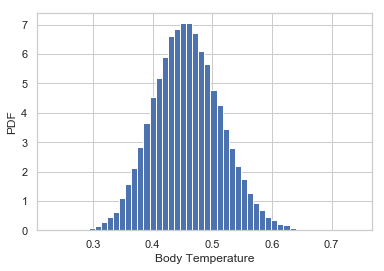

In [21]:
bs_replicates = draw_bs_reps(df.temperature,np.var,100000,len_d = len(df.temperature))


# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Bootstrap hypothesis test with shifting

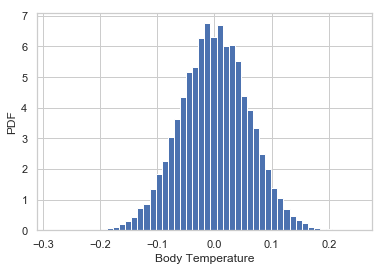

Pvalue computed using Bootstrap replicates: 0.0001


In [22]:
df['shiftedTemp']= df['temperature'] - np.mean(df['temperature']) + 98.6

bs_replicates = draw_bs_reps(df.shiftedTemp,diff_from_popmean,100000,len_d = len(df.shiftedTemp))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('PDF')


plt.show()

p_value = (np.sum(bs_replicates) <= np.mean(df['shiftedTemp']))/10000
print("Pvalue computed using Bootstrap replicates:",p_value)


The low p-value suggests that the null hypothesis that given temperature and Shifted Temperature have the same temperature mean is false.


# Draw a small sample of size 10 from the data and repeat both frequentist tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 



### Plot ECDF with a sample from the give temperature sample

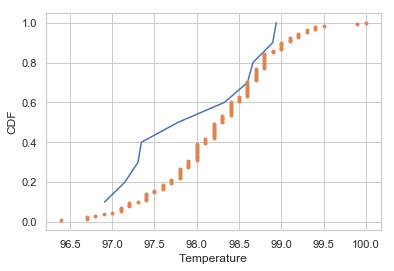

In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



# Compute mean and standard deviation: mu, sigma
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
plt.show()


In [24]:

sampleSize10 = np.random.choice(df.temperature, size=10)
populationMean = 98.6
print(sampleSize10)

[ 98.4  98.   97.2  97.4  98.1  98.6  96.7  97.5  98.9  99.1]


In [25]:
## Running a one sample t-test 2 tailed with the internal scipy function
t1, pt1 = stats.ttest_1samp(sampleSize10, populationMean)       # 1-sample two sided test
print("t = {:.8f}".format(t1))
print("pt = {:.8f}".format(pt1))

t = -2.47004278
pt = 0.03556777


In [26]:
import statsmodels.stats.weightstats as weightstats

## running a one sample z-test 2 tailed with the statsmodels ztest function
z1, pz1 = weightstats.ztest(sampleSize10, value=populationMean)
print("z = {:.8f}".format(z1))
print("pz = {:.8f}".format(pz1))

z = -2.47004278
pz = 0.01350969


In [27]:

print('p value calculated with the t test is {:.2f} times bigger than that calculated with the z test'.format(pt1/pz1))

p value calculated with the t test is 2.63 times bigger than that calculated with the z test


With n=10 both tests calculate a p value that is larger than alpha 97.5% and so with this small a sample size we keep the null hypothesis concluding that the true pop mean may be 98.6

With a small sample sizes probabilities come out much larger - so for more accurate statistics you need larger samples whenever possible.

z stats are over estimating the confidence we have in our hypothesis making it more likely we reject the null hypothesis and potentially make an error. For small sample sizes and mean test statistics a t-test should be used.

### Empirical distribution of random sample means

Sample size:  10
Population mean: 98.24453125000002
Average of sample means:  temperature    98.243952
dtype: float64
Population SD: 0.6791318669989184
SD of sample means: temperature    0.20667
dtype: float64
Standard Error: 0.0600273435594


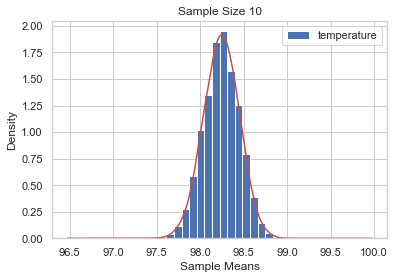

t = -544.78981452
pt = 0.00000000
z = -544.78981452
pz = 0.00000000


In [28]:
def simulate_sample_mean(df,sample_size, repetitions):

    means = []

    for i in range(repetitions):
        new_sample = df.sample(sample_size)
        new_sample_mean = np.mean(new_sample)
        means = np.append(means, new_sample_mean)

    sample_means = pd.DataFrame(means)
    sample_means.rename(columns={0:'temperature'},inplace=True)

    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(df))
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", np.std(df))
    print("SD of sample means:", np.std(sample_means))
    
    standardError = np.std(df) / np.sqrt(len(df))
    print("Standard Error:", standardError)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.plot.hist(bins=20,normed=True)
    sample_means['temperature'].plot.kde(x='temperature',c='r')
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    plt.show()
    
    t1, pt1 = stats.ttest_1samp(sample_means['temperature'], 98.6)       # 1-sample two sided test
    print("t = {:.8f}".format(t1))
    print("pt = {:.8f}".format(pt1))
    
    ## running a one sample z-test 2 tailed with the statsmodels ztest function
    z1, pz1 = weightstats.ztest(sample_means['temperature'], value=98.6)
    print("z = {:.8f}".format(z1))
    print("pz = {:.8f}".format(pz1))
    
    # Focus on 10% condition. If Sampling without replacement, n < 10% of the population
simulate_sample_mean(df['temperature'], 10, 100000)


Empirical distribution of random sample means for sample size 10 indicates no difference in t and z statistic probability.

We can sample the data at various sizes (say steps of 10 between 10 and 130) and determine both t- and z-tests. At each sample size, we can repeat the measurements many, many times. This way we can get the average test statistic which should be relatively unbiased estimate. We can do this below and then plot the p-value as a function of (sub)sample size. A good check is for the values at x=130 are the same ones calculated in Question 3 above.

In [47]:
#Dataframe to hold results 
import statsmodels.api as sm
sample_results = pd.DataFrame(index=range(13),columns=['x','tp','zp'])

def subsample(data,n,size):
    '''Function for subsampling for the test statistics'''
    t_test, z_test = [], []
    for i in range(size):
        sample = data.sample(n,replace=False) #Sample w/out replacements
        ts, tp = stats.ttest_1samp(sample.temperature, 98.6)
        zs, zp = weightstats.ztest(sample.temperature, value=98.6)
        t_test.append(tp)
        z_test.append(zp)
    return (np.mean(t_test), np.mean(z_test)) #Return the average test statistics

#Loop over the entire range of size of dataset, in steps of 10
for i in range(1,14):
    tp, zp = subsample(df['temperature'], i*10, 1000)
    sample_results.x[i-1]  = i*10
    sample_results.tp[i-1] = tp
    sample_results.zp[i-1] = zp
    
#Plot the results including a line for alpha=0.05
plt.plot(sample_results.x, sample_results.tp, marker='.', ms=20, label='t-test')
plt.plot(sample_results.x, sample_results.zp, marker='.', ms=20, label='z-test')
plt.axhline(0.05, color='red', ls='--', lw=1.)
plt.xlabel('Subsample Size')
plt.ylabel('p-value')
plt.ylim(1e-8,1e0)
plt.legend()
plt.yscale('log')
plt.show()

AttributeError: 'Series' object has no attribute 'temperature'


We can see that it takes a sample size at or greater than 30 for the p-value of either test statistic to be at the $\alpha$ = 0.05 level (the dotted red line). This seems to make sense that value is the general rule of thumb for these types of calculations. It is also worth noting we do recover the original values at the subsample size of 130.


# Is there a significant difference between males and females in normal temperature?

#What testing approach did you use and why?
#Write a story with your conclusion in the context of the original problem. 



This is going to be a 2 sample hypothesis test using a t statistic as there are two independent samples males and females.
We are interested in the difference of the mean of the populations.

Null Hypothesis: The mean temperatures of Males and Female humans are the same  $\mu_M - \mu_F = 0$
Alt hypothesis: There is a difference in the population means $\mu_M - \mu_F \neq 0$

Setting alpha= 0.05 to get 95% confidence in the conclusion

It is best to use a permutation test since it exactly simulates the null hypothesis. A two-sample t-test is also appropriate since the means of two independent samples are compared. First, some graphical data analysis:

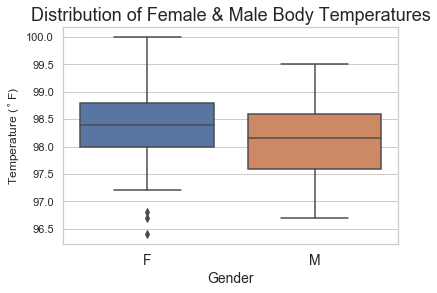

In [38]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
fig = plt.xlabel('Gender', fontsize=14)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [39]:
males = df.loc[df.gender == 'M', 'temperature']
females = df.loc[df.gender == 'F', 'temperature']
n = len(males)
m = len(females)
print('Total men in the  sample {}, and total women in the sample {}'.format(n,m))

Total men in the  sample 64, and total women in the sample 64


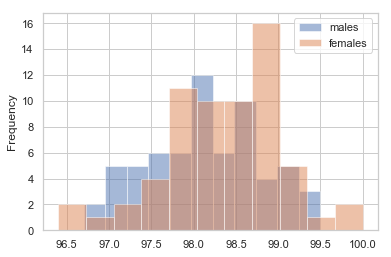

In [40]:
males.plot(kind='hist', bins=11, alpha=0.5, label='males')
females.plot(kind='hist', bins=11, alpha=0.5, label='females')
plt.legend()
plt.show()

Text(0.5,1,'Distribution of Female and Male body temperature')

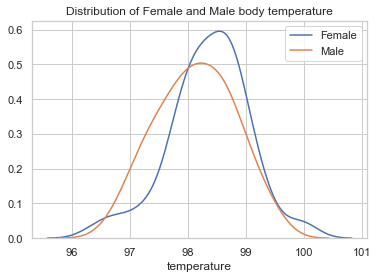

In [41]:
sns.distplot(females,hist=False,label='Female')
sns.distplot(males,hist=False,label='Male')
plt.title('Distribution of Female and Male body temperature')

1. our sample has been randomly chosen
2. n is larger than 30 for both populations so assuming normal
3. Independence our samples are less than 10% of the population of humans
4. There is a clear difference in means of two samples which can not be ignored.
5. The box plot and the distribution plots also indicate there might be difference in distributions as well.
6. Male body temperatures are closer to normal distribution than their female counterparts, but both are nearly normal and hence CLT can be applied.

In [42]:
# Assuming the null hypothesis means we can combine both groups
varMales = np.var(males, ddof=1)
varFemales =np.var(females, ddof=1)
std_combined = np.sqrt(varMales/len(males)+varFemales/len(females))
#standard error ?

z_score = (males.mean() - females.mean())/std_combined
print("z-stat for the two sample means with common standard error = {:.5f}".format(z_score))
pval= 2*(1 - stats.norm.cdf(abs(z_score)))
print("pvalue obtained for two sample z-test = {:.5f}".format(pval))

z-stat for the two sample means with common standard error = -1.87204
pvalue obtained for two sample z-test = 0.06120


p-value computed using z-stat and builtin method is 0.0222 < 0.05. 


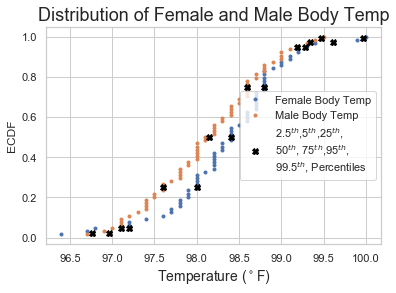

In [36]:
# Compute percentiles:
percentile = np.array([2.5,5,25,50,75,95,97.5,99.5])
f_percentiles = np.percentile(df.temperature[df.gender == 'F'], percentile)
m_percentiles = np.percentile(df.temperature[df.gender == 'M'], percentile)

# Compute ECDFs:
fx_temp, fy_temp = ecdf(df.temperature[df.gender == 'F'])
mx_temp, my_temp = ecdf(df.temperature[df.gender == 'M'])

# Plot both ECDFs on the same plot:
fig = plt.plot(fx_temp, fy_temp, marker='.', linestyle='none')
fig = plt.plot(mx_temp, my_temp, marker='.', linestyle='none')

# Overlay percentiles on each plot:
fig = plt.plot(f_percentiles, percentile/100, marker='X', linestyle='none', color='black')
fig = plt.plot(m_percentiles, percentile/100, marker='X', linestyle='none', color='black')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('ECDF')
fig = plt.legend(('Female Body Temp', 'Male Body Temp', '2.5$^{th}$,5$^{th}$,25$^{th}$, \n50$^{th}$, 75$^{th}$,95$^{th}$,\n99.5$^{th}$, Percentiles'), loc='center right')
fig = plt.title('Distribution of Female and Male Body Temp', fontsize=18)

# Save and display the plots:
plt.show()

The box plots and ECDF charts shows that Males  and Females are not identically distributed. There is a difference in the temperatures for all the different percentiles indicative of female body temperature to be more than male consistently. 75% of the females had 98.4 or less and 75% of the males had 98.2 or less body temperatures.

In [43]:
# Define permutation functions:

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def difference_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

p-value = 0.0634


Text(0.5,0,'Difference of means')

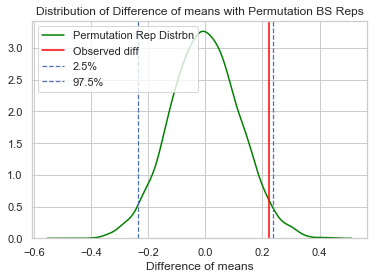

In [44]:
# Seed the random number generator:
np.random.seed(15)

# Compute empirical difference as difference in sample means
empirical_difference = difference_of_means(females, males)

# Draw 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(females, males, difference_of_means, size=10000)


sns.distplot(permutation_replicates, hist=False,color='green',label='Permutation Rep Distrbn')
plt.axvline(empirical_difference,color='red',label='Observed diff')
plt.axvline(np.percentile(permutation_replicates, 2.5), linestyle='--',linewidth=1.25,label='2.5%')
plt.axvline(np.percentile(permutation_replicates, 97.5), linestyle='--',linewidth=1.25,label='97.5%')
# Compute and print p-value for the hypothesis 
print("p-value =", 2*np.sum(permutation_replicates >= np.abs(empirical_difference))/10000)
plt.legend(loc='upper left')
plt.title('Distribution of Difference of means with Permutation BS Reps')
plt.xlabel('Difference of means')




The above plot is obtained by,

Drawing permutations from the original sample of size 130, meaning all 130 samples are present, but their order is shuffled.
Treating first 65 as female temperatures and next 65 as male temperatures.
Taking the difference between means of these two sets.
Plotting the difference.

#### Visualizing permutation sampling

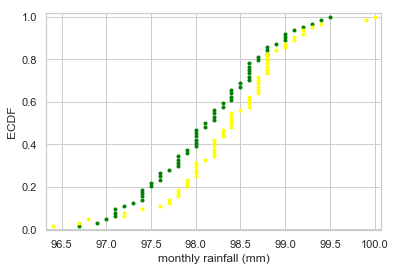

In [45]:
for _ in range(500):

    # Generate permutation samples
    permutation_sample_1, permutation_sample_2 = permutation_sample(males, females)

    # Compute ECDFs
    x_1, y_1 = ecdf(permutation_sample_1)
    x_2, y_2 = ecdf(permutation_sample_2)

    # Plot ECDFs of permutation sample
  #  _ = plt.plot(x_1, y_1, marker='.', linestyle='none',color='red', alpha=0.02)
  #  _ = plt.plot(x_2, y_2, marker='.', linestyle='none',color='blue', alpha=0.02)
    
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(males)
x_2, y_2 = ecdf(females)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='green')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='yellow')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and concentrate at the center of ecdfs of original data(green & yellow). ECDFs from the permutation samples appear to overlap with the some observed data, suggesting that the hypothesis is partially in alignment with the data. Males  and Females are not identically distributed.

In [46]:
# Assuming the null hypothesis means we can combine both groups
var_m = np.var(males, ddof=1)
var_f =np.var(females, ddof=1)
sd_combined = np.sqrt(var_m/n+var_f/m)

# at 95% two tail alpha=0.05 giving 0.025 in each tail and an area to left of crit_t of 0.975
ddof = (var_m/n+var_f/m)**2 / ((var_m/n)**2/(n-1) + (var_f/m)**2/(m-1))
#dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
crit_t = stats.t.ppf(0.975, ddof)
print('degrees of freedom : {:.5}'.format(ddof))

test_stat = (np.mean(males) - np.mean(females))/sd_combined

print('Test_statistic  = {:.7}, \nthe test critical value is {:.7}'.format(test_stat, crit_t))


# Save results of a two sample t-test:
t = stats.ttest_ind(females, males)[0]
p = stats.ttest_ind(females, males)[1]

print('t-statistic:', t)
print('p-value:', p)

# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.025, df=130-1)), (stats.t.ppf(q=0.975, df=130-1)))


mean_m = np.mean(males)
mean_f = np.mean(females)

# 2-sample two sided test from sample statistics only
t2,pt2 = stats.ttest_ind_from_stats(mean_m, np.sqrt(var_m), len(males), mean_f, np.sqrt(var_f), len(females), equal_var=False)
print('calculated t-statistic with means: {:.7}'.format(t2))
print('with p value: {:.7}'.format(pt2))

degrees of freedom : 125.91
Test_statistic  = -1.872037, 
the test critical value is 1.978985
t-statistic: 1.87203699022
p-value: 0.0635197686958
-1.97852449146 1.97852449146
calculated t-statistic with means: -1.872037
with p value: 0.06352147


#### Interpretation
As one would expect/guess, the curve has peak at 0. Most of such permutations yield two sample sets with same mean.
The observed difference in the means of female body temperature and male body temperature lies within the 95% confidence interval of the above distribution, thus making it impossible to reject the null hypothesis that mean body temperature of female and male bodies are same.
P-value here means P(abs diff between male and female population means >= observed difference | diff follows the distribution above), came to be 0.063 > 0.05, which is agreeing with the above statement.

# At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 


The null hypothesis was rejected with a 99.9% confidence interval, but analysis of abnormal values at different levels may be helpful.



In [55]:
# Save the critical value at 99.95% confidence:
z_critical = norm.ppf(0.975)
z_critical

1.959963984540054

In [56]:
print('Standard Error of the Mean:', stdError)

# Calculate and save the margin of error:
moe = z_critical * stdError
print('Margin of Error:', moe)

Standard Error of the Mean: 0.0602632082933
Margin of Error: 0.118113717848


In [57]:
#METHOD 1 : to check confidence interval


# Calculate and save the 95% confidence interval:
CI = np.array([sampleMean - moe, sampleMean + moe])
print('95% Confidence Interval:', CI)

#METHOD 2 : to check confidence interval
# Seed the random number generator:
np.random.seed(15)


# Draw bootstrap replicates of temperatures:
bs_replicates = draw_bs_reps(df.temperature,np.mean,100000,len_d = len(df.temperature))

# Compute the 95% confidence interval:
CI = np.percentile(bs_replicates, [2.5, 97.5])
print('95% Confidence Interval:', CI)

95% Confidence Interval: [ 98.12641753  98.36264497]
95% Confidence Interval: [ 98.1265625  98.3609375]


Even at a 99.9% confidence interval, the range of temperatures is only 98.0 - 98.5°F. Statistics in this case seem to fall short of determining the abnormal body temperature.Values outside the confidence interval should not be rejected as plausible normal body temperatures.

95% Confidence Interval: [-0.11796875  0.1171875 ]


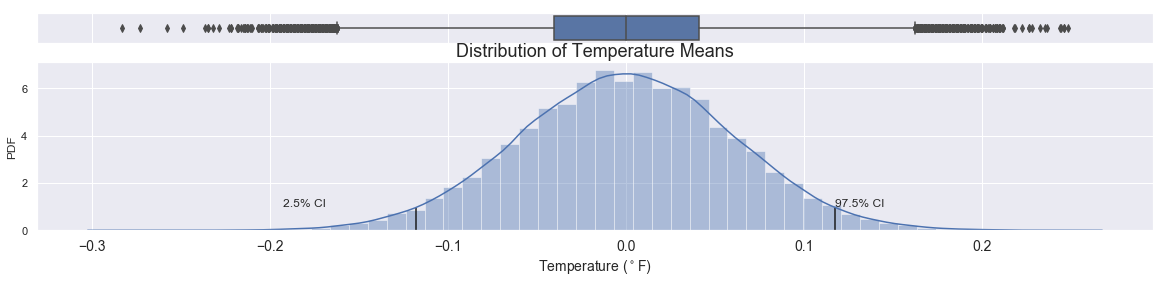

In [49]:
# Compute the 99.9% confidence interval:
CI = np.percentile(bs_replicates, [2.5, 97.5])
print('95% Confidence Interval:', CI)

# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for temperature:
sns.boxplot(bs_replicates, ax=boxplot)

# Add histogram for temperature:
sns.distplot(bs_replicates, ax=histogram)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Temperature Means', fontsize=18)

# Add text and lines marking the 99.9% confidence interval:
plt.text(x=CI[0]-0.075, y=1, s='2.5% CI')
plt.vlines(ymin=0, ymax=1, x=CI[0])
plt.text(x=CI[1], y=1, s='97.5% CI')
plt.vlines(ymin=0, ymax=1, x=CI[1])

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

### Using a prediction interval to figure out abnormal temperature ranges
confidence interval is the wrong statistic to check! Since CI is calculated using estimated population statistics, the estimations are going to be more certain the larger the sample size. An individual draw from a normal distribution, however, should be checked against the prediction interval. This is calculated using the sample standard deviation. Since an individual's temperature is one sample, it should be evaluated by the sample statistics for an individual (i.e., n=1).

Here is a very simple method to determine the 95% prediction interval:

In [50]:
# t-based confidence interval
crit_t = stats.t.ppf(0.975, len(df.temperature) - 1)
temp_sem = df.temperature.std()/(np.sqrt(len(df.temperature)))
ci_width = crit_t * temp_sem
[cil, ciu] = df.temperature.mean() + np.array([-1, 1]) * ci_width
print('The 95% confidence interval for the mean of the population is     {:.5} to {:.5}'.format(cil,ciu))
print('This is not a good estimate for where abnormal temperatures falls as most of the sample are actually outside it.')

The 95% confidence interval for the mean of the population is     98.125 to 98.364
This is not a good estimate for where abnormal temperatures falls as most of the sample are actually outside it.


In [51]:

# t-based prediction interval 
pi_width = crit_t * df.temperature.std() * np.sqrt((1 + 1/(len(df.temperature))))
[pil, piu] = df.temperature.mean() + np.array([-1, 1]) * pi_width
print('The 95% prediction interval for the of the population is         {:.5} to {:.5}'.format(pil,piu))

The 95% prediction interval for the of the population is         96.89 to 99.599


In [52]:
# using https://stackoverflow.com/a/28243282/1215012 SO answer as guidance - and the single draw equation
[snl, snu] = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std(ddof=1))
print('The 95% prediction interval for the of the population is         {:.5} to {:.5}'.format(snl, snu))

The 95% prediction interval for the of the population is         96.908 to 99.581


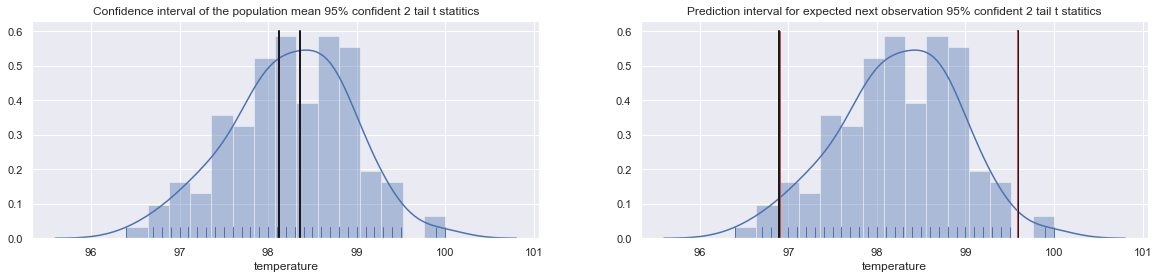

In [53]:
sns.set()
plt.rcParams["figure.figsize"] = (20,4)
fig, (ax1,ax2) = plt.subplots(1,2)
sns.distplot(df.temperature, bins = 15, rug = True, ax=ax1)
ax1.plot([cil,cil] , [0.6, 0], linewidth = 2, color = "k")
ax1.plot([ciu,ciu], [0.6, 0], linewidth = 2, color = "k")
ax1.set_title('Confidence interval of the population mean 95% confident 2 tail t statitics')

sns.distplot(df.temperature, bins = 15, rug = True, ax=ax2)
ax2.plot([pil,pil], [0.6, 0], linewidth = 2, color = "k")
ax2.plot([piu,piu], [0.6, 0], linewidth = 2, color = "k")
ax2.plot([snl,snl], [0.6, 0], linewidth = 1, color = "r")
ax2.plot([snu,snu], [0.6, 0], linewidth = 1, color = "r")
ax2.set_title('Prediction interval for expected next observation 95% confident 2 tail t statitics')
plt.show()

#### Interpretation

The range in the confidence interval is very small and relying only on the confidence interval would have led to errors. 
Considering the range prediction interval shows ( 96.89 to 99.599) is a good indicator of normal temperature 
with any values below 96.89 and values above 99.599 to be abnormal. Here we are 95% confident that population mean have abnormal temperature  96.89 and  above 99.599.